In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Split the dataset into training and test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(trainX, trainy)

# Predict probabilities for the test set
lr_probs = model.predict_proba(testX)[:, 1]

In [10]:
#len(lr_probs)
#len(model.predict(testX))

500

Logistic: ROC AUC=0.903


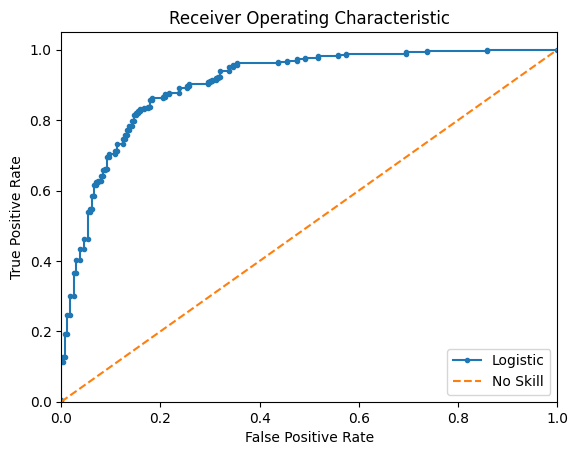

In [11]:
# Calculate the AUROC
lr_auc = roc_auc_score(testy, lr_probs)

# Print the AUROC
print('Logistic: ROC AUC=%.3f' % lr_auc)

# Compute the ROC curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(testy, lr_probs)

# Plot the ROC curve
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [12]:
lr_thresholds

array([           inf, 9.99810555e-01, 9.92408365e-01, 9.91679828e-01,
       9.90144555e-01, 9.89867568e-01, 9.79265264e-01, 9.79115074e-01,
       9.61958719e-01, 9.61681033e-01, 9.47453942e-01, 9.46083338e-01,
       9.24765054e-01, 9.23985965e-01, 9.03776284e-01, 8.96563782e-01,
       8.88294853e-01, 8.87112806e-01, 8.78078335e-01, 8.76612424e-01,
       8.28429524e-01, 8.27959147e-01, 8.23317999e-01, 8.22322697e-01,
       8.07658186e-01, 8.07653554e-01, 7.79441385e-01, 7.68060225e-01,
       7.63062006e-01, 7.62912313e-01, 7.61564252e-01, 7.58648634e-01,
       7.49642618e-01, 7.46446600e-01, 7.32873897e-01, 7.31335000e-01,
       7.23434675e-01, 7.15862908e-01, 6.92545325e-01, 6.92512778e-01,
       6.92244651e-01, 6.82799726e-01, 6.80222962e-01, 6.79729854e-01,
       6.70153267e-01, 6.56639891e-01, 6.47658558e-01, 6.46419471e-01,
       6.36044813e-01, 6.35647643e-01, 6.18886716e-01, 6.14825818e-01,
       6.12198494e-01, 6.03026960e-01, 5.92619457e-01, 5.90439114e-01,
      

# AUC Precision

AUC-PR: 0.943


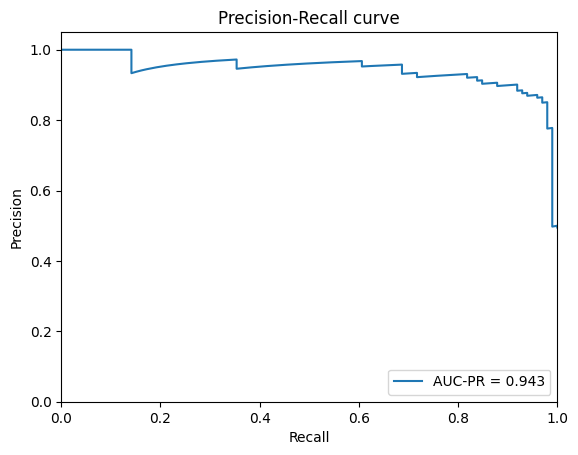

In [13]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Generate a binary classification dataset.
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1, 1], random_state=1)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a Logistic Regression object
clf = LogisticRegression(random_state=1)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
# y_pred = clf.predict(X_test)

lr_probs = clf.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, _ = precision_recall_curve(y_test, lr_probs)

# Compute the AUC-PR
auc_pr = auc(recall, precision)
print('AUC-PR: %.3f' % auc_pr)

# Plot the precision-recall curve
plt.plot(recall, precision, label='AUC-PR = %0.3f' % auc_pr)
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


# Accuracy, Confusion Matrix and Classification Report

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']


In [15]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=5, test_size=0.3)


In [16]:
# Fit a Gaussian Naive Bayes classifier to the training data
model = GaussianNB().fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [17]:
# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Compute classification report
cr = classification_report(y_test, y_pred)
print('Classification Report:\n', cr)


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



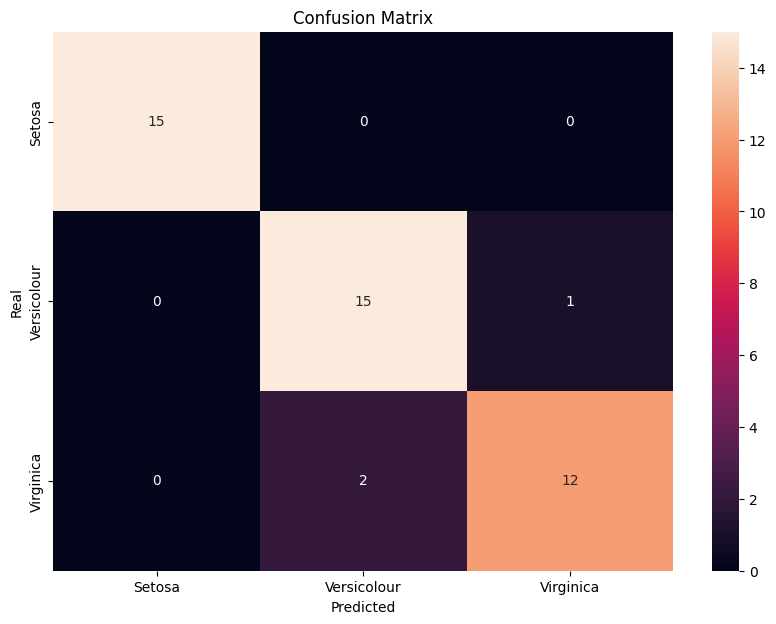

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the confusion matrix
labels = ['Setosa', 'Versicolour', 'Virginica']

# Plot the confusion matrix using seaborn's heatmap function
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()
